In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import copy
import scipy

## Importing Dataset

In [3]:
df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')

In [4]:
#have a look on the dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory data analysis (EDA)
Our Target Variable X is Churn. In this step, I will analyze the relationship between the Target Variable X and the other features.

In [7]:
#checking null values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There is no missing value in the dataset. Furthermore, all the columns are numerical values except 2 columns are string.

### Target Varibale: Chrun

In [9]:
df.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

As you can see, almost 80% of churn is 0 and 20 is 1

### Correlation

<AxesSubplot:>

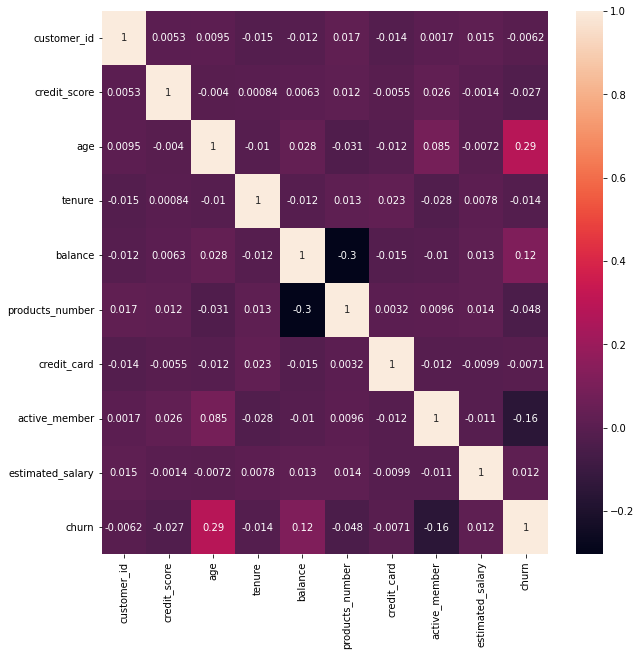

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True)

We can clearly see that age has the highest correlation with the target variable among all other features. Furthermore, we can say that balance has a high correltion with the churn compared to other features. As a conclusion, 'age' and 'balance' are correlated with 'churn' (target variable) 

### Age VS Chrun

<AxesSubplot:xlabel='age', ylabel='Count'>

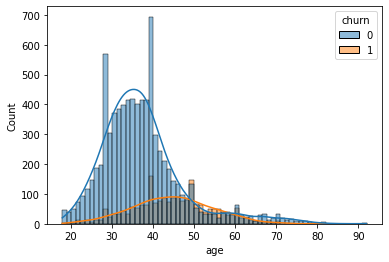

In [11]:
#age distribution
sns.histplot(data=df, x='age', hue='churn',kde=True)

In [12]:
#age and Target Variable
age_mean = df.groupby('age')['churn'].mean()
age_mean

age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: churn, Length: 70, dtype: float64

Text(0, 0.5, 'Churn Ratio')

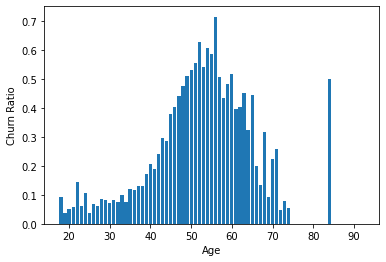

In [13]:
plt.bar(age_mean.index, age_mean.values)
plt.xlabel('Age')
plt.ylabel('Churn Ratio')

Churn ration is very high between ages of 50 and 60

### Balance & Churn

<AxesSubplot:xlabel='balance', ylabel='Count'>

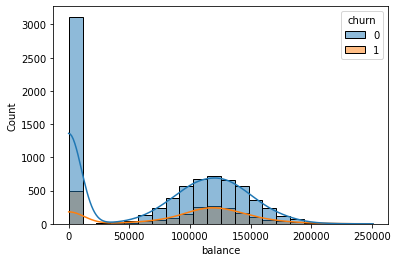

In [14]:
sns.histplot(data=df, x='balance',hue='churn',kde=True)

### Credit Score & Churn

<AxesSubplot:xlabel='churn', ylabel='credit_score'>

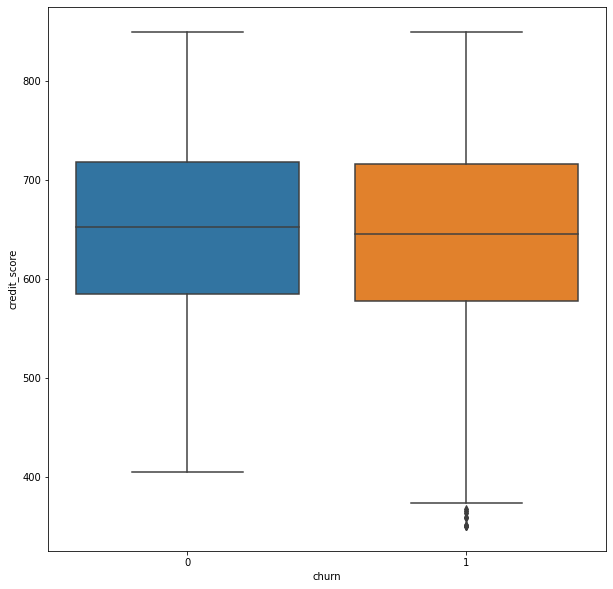

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x='churn',y='credit_score', data=df)

### Estimated Salary & Churn

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

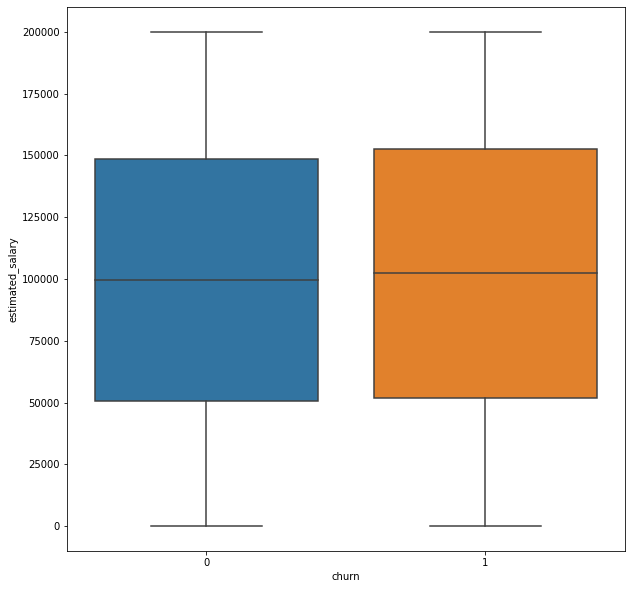

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='churn', y='estimated_salary', data=df)

### Gender & Churn

<AxesSubplot:xlabel='gender', ylabel='count'>

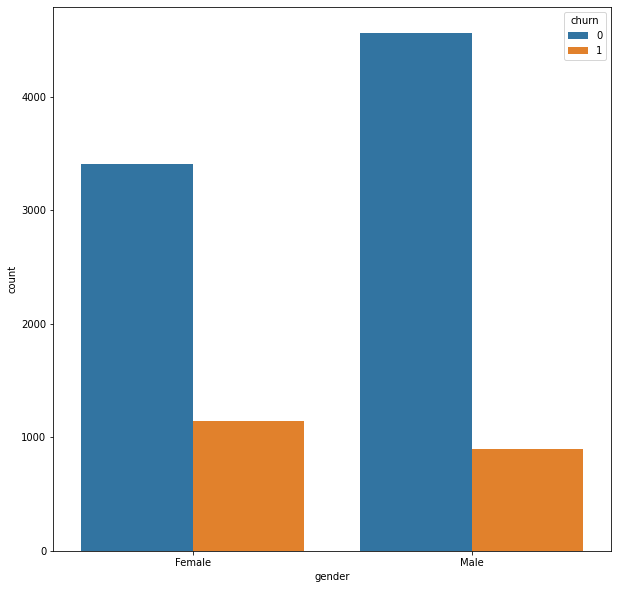

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x='gender',hue='churn',data=df)

### Country & Churn

<AxesSubplot:xlabel='country', ylabel='count'>

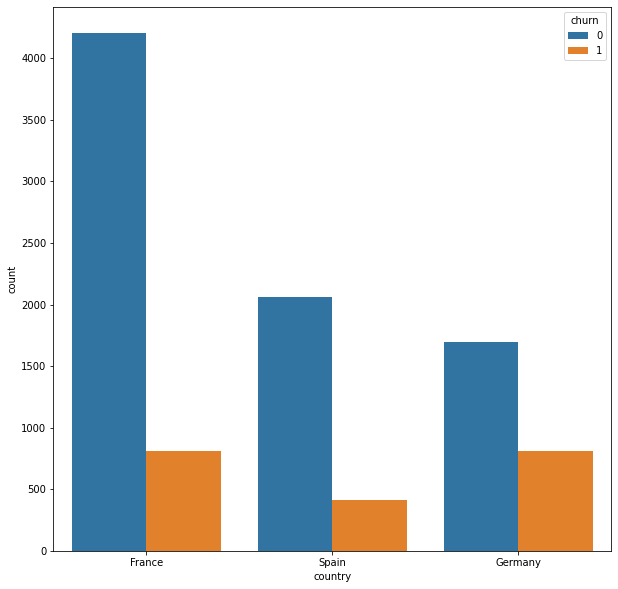

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', hue='churn', data=df)

### Credit Card & Churn

<AxesSubplot:xlabel='credit_card', ylabel='count'>

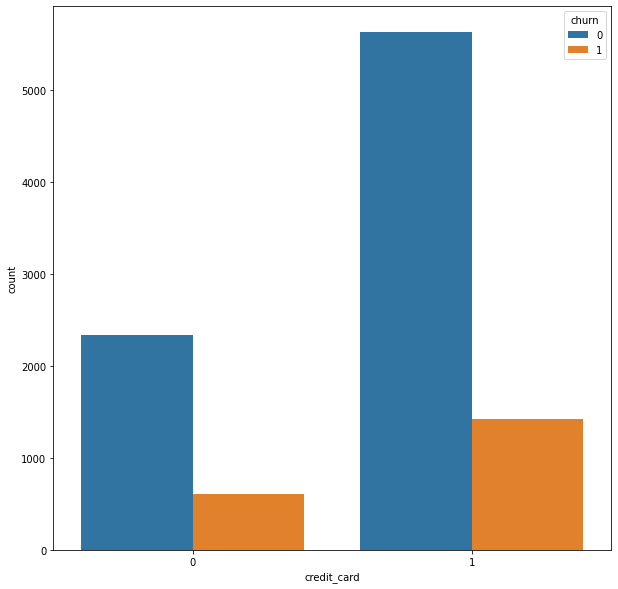

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x='credit_card', hue='churn', data=df)

### Product Number & Churn

<AxesSubplot:xlabel='products_number', ylabel='count'>

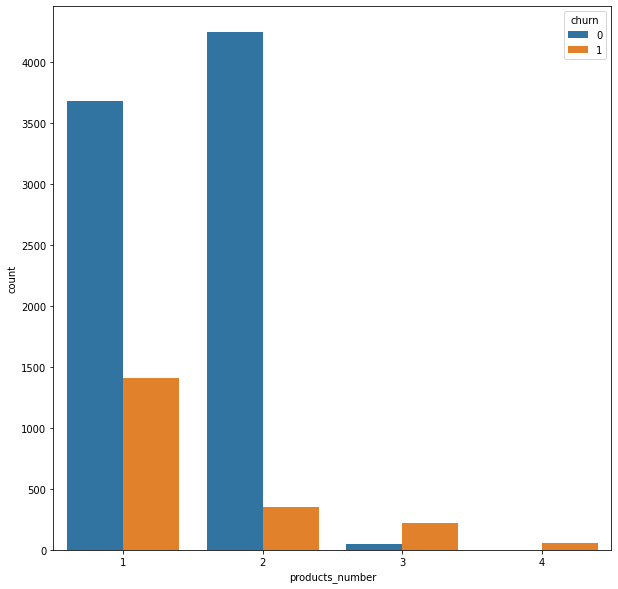

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='products_number', hue='churn', data=df)

### Active Members & Churn

<AxesSubplot:xlabel='active_member', ylabel='count'>

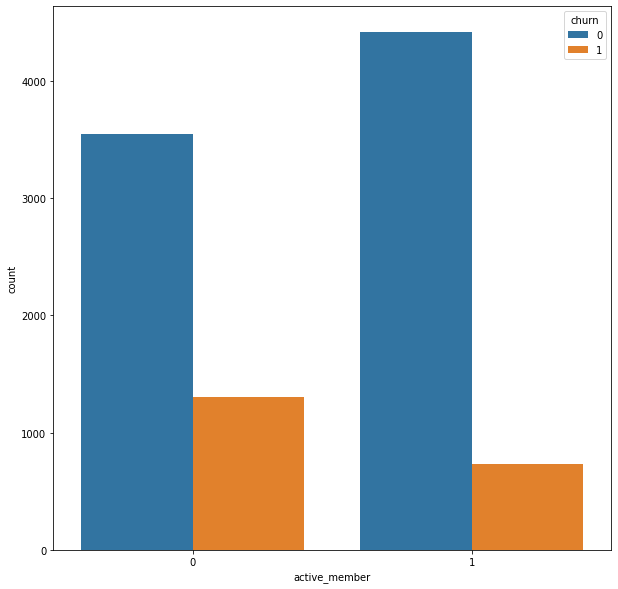

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='active_member', hue='churn', data=df)

### Tenure & Churn

<AxesSubplot:xlabel='tenure', ylabel='count'>

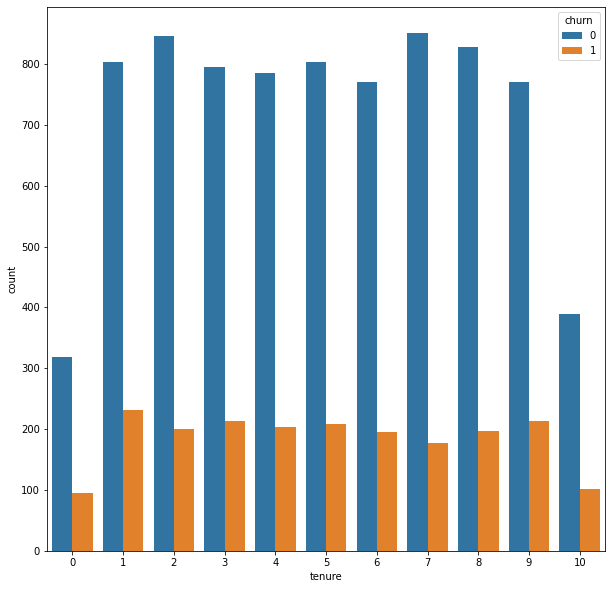

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='tenure', hue='churn', data=df)

## Handling Categorical Data

### Gender & Country

In [23]:
df = pd.get_dummies(df, columns = ['country', 'gender'])

## Modeling: Logistic Regression with a Neural Network

In this part, I will build a logistic regression to predict whether a customer will churn or not using the Bank Customer Churn dataset on Kaggle.

### Overview of the problem
I will build a simple algorithm that can correctly classify either a certain customer will churn or not.

In [24]:
def standardize(X_tr):
    for i in range(X_tr.shape[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

In [25]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [26]:
from sklearn.model_selection import train_test_split
Y = df['churn'].values
X = df.drop(['churn','customer_id'], axis=1).values
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X, Y, test_size = 0.25, random_state = 10)
standardize(train_set_x)
standardize(test_set_x)

In [27]:
train_set_x

array([[-1.51367978,  0.09690851,  0.34692909, ..., -0.57160228,
        -0.91039675,  0.91039675],
       [-1.0678997 ,  0.19133671, -0.35055601, ..., -0.57160228,
         1.0984222 , -1.0984222 ],
       [-0.43551401,  0.00248031,  1.04441418, ..., -0.57160228,
         1.0984222 , -1.0984222 ],
       ...,
       [-1.98019382,  0.09690851,  0.34692909, ..., -0.57160228,
         1.0984222 , -1.0984222 ],
       [ 0.60118386, -0.46966067, -1.0480411 , ..., -0.57160228,
         1.0984222 , -1.0984222 ],
       [ 0.21760565,  0.09690851,  1.74189927, ..., -0.57160228,
        -0.91039675,  0.91039675]])

In [28]:
train_set_x = train_set_x.reshape((train_set_x.shape[1],train_set_x.shape[0]))
test_set_x = test_set_x.reshape((test_set_x.shape[1],test_set_x.shape[0]))
train_set_y = train_set_y.reshape((1,train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1,test_set_y.shape[0]))

In [29]:
train_set_y.shape

(1, 7500)

In [30]:
train_set_x.shape, test_set_x.shape

((13, 7500), (13, 2500))

### Training Examples and Testing Examples:
Lets find the values for: 
   + m_train (number of training examples)
   + m_test (number of test examples)

In [31]:
train_set_x.shape, test_set_x.shape

((13, 7500), (13, 2500))

In [32]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

Number of training examples: m_train = 13
Number of testing examples: m_test = 13


### General Architecture of the Learning Algorithms
#### Mathematical expression of the algorithm:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$


The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)




### 4.1 - Helper functions


### Exercise 3 - sigmoid
Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

In [33]:
#sigmoif function

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

  
    s = 1/(1+np.exp(-z))
    
    
    return s

### 4.2 - Initializing parameters


### Exercise 4 - initialize_with_zeros
Implement parameter initialization in the cell below. I have to initialize w as a vector of zeros using np.zeros() in the Numpy library.

In [34]:
#initialize_with_zeros function


def initialize(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    
   
  
    b = 0
    w = np.zeros(shape=(dim,1))
    return w,b
    

    return w, b

In [35]:
w,b = initialize(train_set_x.shape[0])
w
b
w.shape

(13, 1)

In [36]:
train_set_x.shape

(13, 7500)

### 4.3 - Forward and Backward propagation (Gradient Descent Algorithm)


Now that the parameters are initialized, I can do the "forward" and "backward" propagation steps for learning the parameters.

### - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**How**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

### -optimize
- I have initialized your parameters.
- I am also able to compute a cost function and its gradient.
- Now, I want to update the parameters using gradient descent.

<a name='ex-6'></a>
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [37]:
# gradient descent function

def gradient_descent(w,b,X,Y,num_iterations=10, learning_rate=0.01):
    costs = []
    m = 10000
    for i in range(num_iterations):
        z = np.dot(w.T,X) + b
        A = sigmoid(z)
        cost  = -(1/m)*(np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)))
        dz = A - Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i%100==0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
            #test = np.log(A)
    params = {'w':w,
              'b':b}
    return params, costs

###  predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [38]:
#predict function

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)
    
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        
    
    return Y_prediction

## 5 - Merge all functions into a model ##

I will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

###  model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [39]:
#model function

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize parameters with zeros 
    w,b = initialize(X_train.shape[0])
        
    # Gradient descent 
    #parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    params,costs = gradient_descent(w,b,X_train,Y_train,num_iterations, learning_rate)
    # Retrieve parameters w and b from dictionary "parameters"
    w = params['w']
    b = params['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
   
    
    d = {"costs": costs,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Lets train the model


In [40]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=5000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.519860
Cost after iteration 100: 0.478316
Cost after iteration 200: 0.449678
Cost after iteration 300: 0.429762
Cost after iteration 400: 0.415756
Cost after iteration 500: 0.405792
Cost after iteration 600: 0.398623
Cost after iteration 700: 0.393411
Cost after iteration 800: 0.389587
Cost after iteration 900: 0.386756
Cost after iteration 1000: 0.384647
Cost after iteration 1100: 0.383064
Cost after iteration 1200: 0.381869
Cost after iteration 1300: 0.380962
Cost after iteration 1400: 0.380272
Cost after iteration 1500: 0.379743
Cost after iteration 1600: 0.379338
Cost after iteration 1700: 0.379025
Cost after iteration 1800: 0.378784
Cost after iteration 1900: 0.378597
Cost after iteration 2000: 0.378452
Cost after iteration 2100: 0.378340
Cost after iteration 2200: 0.378252
Cost after iteration 2300: 0.378183
Cost after iteration 2400: 0.378130
Cost after iteration 2500: 0.378088
Cost after iteration 2600: 0.378055
Cost after iteration 2700: 0.378030
Cost

## Bank Chrun Prediction with one hidden layer

In the above code, I tried Logistic regression, and as you can see it did not perfomr that well. Next, I am going to train a Neural Netwok witha single hidden layer and see how that handles the same problem.
**The model**:
<img src="./classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

<a name='4-1'></a>
### 4.1 - Defining the neural network structure ####

<a name='ex-2'></a>
### - layer_sizes 

Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (**set this to 4, only for this Example **) 
    - n_y: the size of the output layer



In [41]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y 
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4
    return (n_x,n_h,n_y)

<a name='4-2'></a>
### 4.2 - Initialize the model's parameters ####

<a name='ex-3'></a>
### -  initialize_parameters

Implement the function `initialize_parameters()`.

**Instructions**:
- I will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- I will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [42]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
    """
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.rand(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

<a name='4-3'></a>
### 4.3 - The Loop 

<a name='ex-4'></a>
### forward_propagation

Implement `forward_propagation()` using the following equations:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$


**Instructions**:

- Check the mathematical representation of your classifier in the figure above.
- Use the function `sigmoid()`. It's already implemented in this notebook.
- Use the function `np.tanh()`. It's part of the numpy library.
- Implement using these steps:
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [43]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

<a name='4-4'></a>
### 4.4 - Compute the Cost

Now that you've computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

<a name='ex-5'></a>
###  - compute_cost 

Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. This is one way to implement one part of the equation without for loops:
$- \sum\limits_{i=1}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)          
```

- Use that to build the whole expression of the cost function.


In [44]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    m = Y.shape[1] #number of examples
    #compute the coss-ebtropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    return cost

<a name='ex-6'></a>
### -  backward_propagation

Implement the function `backward_propagation()`.

**Instructions**: I will use the six equations on the right of this slide, since I am building a vectorized implementation.  

<img src="./grad_summary.png" style="width:600px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Backpropagation. Use the six equations on the right.</font></center></caption>

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [45]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    #First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
    #Retrieve also A1 and A2 from dicionary 'cache'
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A2.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

<a name='ex-7'></a>
### - update_parameters

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

<img src="./sgd.gif" style="width:400;height:400;"> <img src="./sgd_bad.gif" style="width:400;height:400;">
<caption><center><font color='purple'><b>Figure 2</b>: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.</font></center></caption>

**Note**

- Use `copy.deepcopy(...)` when copying lists or dictionaries that are passed as parameters to functions. It avoids input parameters being modified within the function. In some scenarios, this could be inefficient, but it is required for grading purposes.


In [46]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 0.01):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    #Retrieve a copy of each parameter from the dicionary "parameters"
    W1 = copy.deepcopy(parameters['W1'])
    W2 = copy.deepcopy(parameters['W2'])
    b1 = copy.deepcopy(parameters['b1'])
    b2 = copy.deepcopy(parameters['b2'])
    
    #Retrieve each gradient from dictionary "grads"
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    #Update for each parameter
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters
    

<a name='4-7'></a>
### - Integration

I will Integrate the above functions in `nn_model()` 

<a name='ex-8'></a>
### - nn_model

Building a neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [47]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    #Initialize parameters
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    #Loop (gradient descent)
    for i in range(0,num_iterations):
        #Forward propagation
        A2, cache = forward_propagation(X,parameters)
        
        #Cost function
        cost = compute_cost(A2,Y)
        
        #Backpropagation
        grads = backward_propagation(parameters,cache,X,Y)
        
        #Gradient descent parameters upadte
        parameters = update_parameters(parameters,grads)
        
        #print the cost every 1000 iterations
        if print_cost and i%1000 == 0:
            print("Cost after iteration %i: %f" %(i,cost))
            
    return parameters

<a name='5'></a>
## Test the Model

<a name='5-1'></a>
### - Predict

Predict with the model by building `predict()`.
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [48]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    A2, cache = forward_propagation(X,parameters)
    predictions = np.round(A2)
    
    return predictions

<a name='5-2'></a>
### 5.2 - Test the Model on the Bank Churn Dataset

It's time to run the model and see how it performs on a Bank Churn dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units!

In [49]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(train_set_x, train_set_y, n_h = 4, num_iterations = 10000, print_cost=True)


Cost after iteration 0: 0.693149
Cost after iteration 1000: 0.504960
Cost after iteration 2000: 0.503970
Cost after iteration 3000: 0.503926
Cost after iteration 4000: 0.503918
Cost after iteration 5000: 0.503916
Cost after iteration 6000: 0.503915
Cost after iteration 7000: 0.503915
Cost after iteration 8000: 0.503914
Cost after iteration 9000: 0.503914


In [50]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 79.693333%
train accuracy: 79.440000%


(13, 7500)